# Extrasolar Kepler's 3rd Law for Confirmed Planets - Linear Regression in R

Aside from a crashcourse in R, *R Programming A-Z™: R For Data Science With Real Exercises!* by Kirill Eremenko, I do not regularly code or use R. I have done most of my PhD thesis work, and nearly all of my other Data Science/Machine Learning projects, in Python. The goal of this project is to gain some experience in R.

I reference examples from both *Data Science and Machine Learning Bootcamp with R* (in progress) and *Python for Data Science and Machine Learning Bootcamp* by Jose Portilla.



# Kepler's 3rd Law:

For planets orbiting stars where the mass of the star significantly outweights the mass of the planet, i.e. $M_{\rm star} > > M_{\rm planet}$, Kepler's 3rd Law states

$P^2 = \frac{4 \pi^2}{G M_{\rm star}} a^3$

where $P$ is the period, $a$ is the semi-major axis (the long half-axis of an ellipse, for approximately circular orbits this is the orbital radius), $M_{\rm star}$, and $G = 6.67 \times 10^{-11} \ {\rm kg \frac{m^3}{s^2}}$ is Newton's Gravitational constant.

One trick to get rid of the constants as well as to scale the data with respect to some common units of reference, we can divide the equation above by the same equation with Earth's parameters:

$\left( \frac{P}{P_{\rm Earth}} \right)^2 = \frac{M_{\rm \odot}}{M_{\rm star}} \left( \frac{a}{a_{\rm Earth}} \right)^3$

Then to solve for period:

$\frac{P}{P_{\rm Earth}}  = \left( \frac{M_{\rm \odot}}{M_{\rm star}} \right)^{1/2} \left( \frac{a}{a_{\rm Earth}} \right)^{3/2}$

And to break apart this multiplicative relationship we can use logarithms.

$\log_{10} \left( \frac{P}{P_{\rm Earth}} \right) = (-1/2) \log_{10 }\left( \frac{M_{\rm star}}{M_{\rm \odot}} \right)+ (3/2) \log_{10} \left( \frac{a}{a_{\rm Earth}} \right)$

This equation here is a linear equation of the form:

$Y = m_X X + m_Z Z$,

with $Y = \log_{10} \left( \frac{P}{P_{\rm Earth}} \right)$, $X = \log_{10 }\left( \frac{M_{\rm star}}{M_{\rm \odot}} \right)$, and $Z = \log_{10} \left( \frac{a}{a_{\rm Earth}} \right)$.

We can "prove" Kepler's 3rd Law using a Linear Regression such that the coefficients $m_X$ and $m_Z$ should approximately match those in Kepler's 3rd Law.

# The Data

This data comes from the **NASA Exoplanet Archive** https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars .

I chose this data for another project and it contains nearly all current observations of planets that live around other stars (known as 'Exoplanets' or 'Extrasolar Planets'). The data used here is a subset where we have density measurements of the planet, which requires it two be observed using two different methods - and this was chosen for a classifcation project based on planet type *(most planets do not have both of these measurements, and usually only the approximate size is known)*. This is not necessarily relevant to the project, we are simply working through a coding exercise and not a new scientific result.

It is also important to note, in cases where *more than* one measurement is done for a given system, only one published value is available in the table, and thus may or may not be from the same study as other values.

Also, while it is not obvious from me acquiring the data (although it may have been if I dug a little deeper), it's probably the case that the semi-major axis $a$ in the above was derived from the other two quantities in many studies - at least for the majority of the data in this table.  This calculation for some planets is thus completely redundant, and others it has artificial noise built in due to data combining errors. To repeat myself, "we are simply working through a coding exercise and not a new scientific result."

See my other portfolio projects for similar analysis.
*   https://github.com/the-dr-eric-r/DS_Portfolio/blob/main/Exoplanet_DS_Portfolio/exoplanet_analysis_cleaning_ER.ipynb
*   https://github.com/the-dr-eric-r/DS_Portfolio/blob/main/Exoplanet_DS_Portfolio/exoplanet_or_browndwarf_ER.ipynb
*   https://github.com/the-dr-eric-r/DS_Portfolio/blob/main/Exoplanet_DS_Portfolio/linreg_PHYS410_Exoplanets_KEY.mlx

In [1]:
# Read CSV
df_tot <- read.csv('Exoplanets_LinearRegression.csv')
# df <- read.csv('PHYS410_Exoplanets.csv')

In [2]:
head(df_tot)

,pl_name,pl_orbper_yr,pl_orbsmax,pl_orbsmax_n,st_mass
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Terrestrial,0.002016557,0.01544,0.01316405,0.91
2,Terrestrial,0.023170429,0.06450,0.08687866,0.50
3,Terrestrial,0.051633103,0.11010,0.08423645,0.50
4,Terrestrial,0.114128679,0.24100,0.32139460,1.67
5,Jovian,0.004131296,0.02752,0.02227749,0.95
6,Terrestrial,0.036250787,0.10550,0.10939779,0.89


In [3]:
# This dataset has been cleaned for another project, and includes a column with artificial noise
# so we'll need to...
# 1. Remove some unrelated columns
# 2. Calculate the Log_10 of those columns in advance (more later)
nolog_df = subset(df_tot, select = -c(pl_name,pl_orbsmax_n))

In [4]:
head(nolog_df)

,pl_orbper_yr,pl_orbsmax,st_mass
,<dbl>,<dbl>,<dbl>
1,0.002016557,0.01544,0.91
2,0.023170429,0.06450,0.50
3,0.051633103,0.11010,0.50
4,0.114128679,0.24100,1.67
5,0.004131296,0.02752,0.95
6,0.036250787,0.10550,0.89


Explain why logaithms...

In [5]:
# Logarithms

pl_orbper_yr_log = log10(nolog_df$pl_orbper_yr)
#I realized later that Period was done in 'days' not 'years'. The code still uses 'yr', however the results will be updated
pl_orbsmax_log = log10(nolog_df$pl_orbsmax)
st_mass_log = log10(nolog_df$st_mass)

df <- data.frame(pl_orbper_yr=pl_orbper_yr_log,	pl_orbsmax=pl_orbsmax_log, st_mass=st_mass_log)

### Install Libraries

In [6]:
# On Colab
#install.packages("drc")
#install.packages("kableExtra")
install.packages("ggthemes")
install.packages("corrplot")
install.packages("corrgram")
install.packages("caTools")
#install.packages("TeX")

library(ggplot2)
library(ggthemes)
library(dplyr)
library(corrplot)
library(corrgram)
library(caTools)
#library(TeX)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



Explore Data

In [7]:
cor.df <- cor(df)

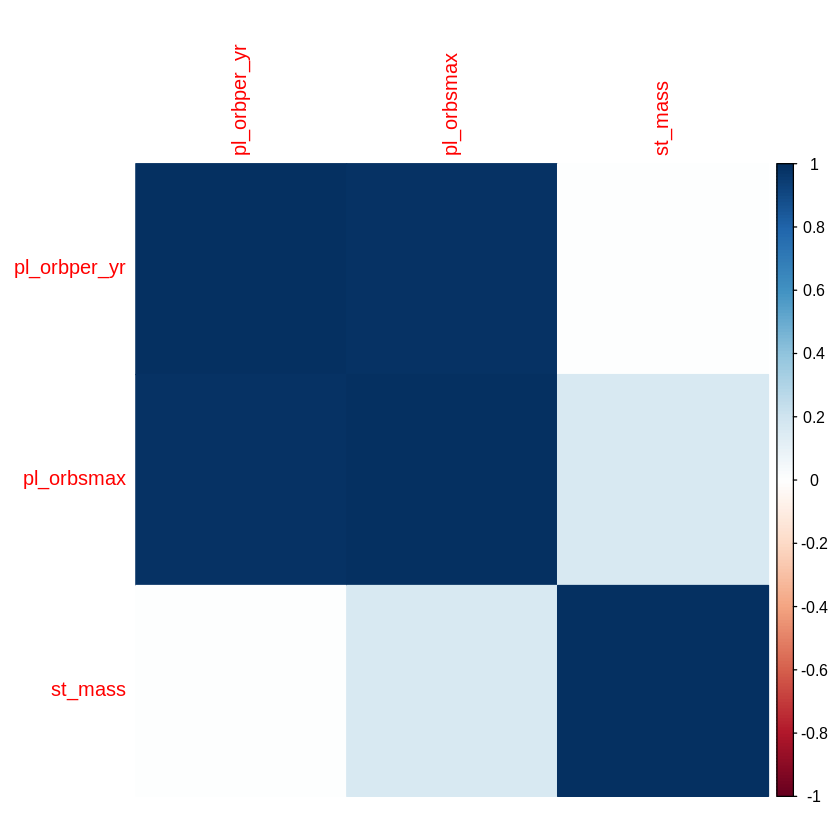

In [8]:
corrplot(cor.df,method='color')

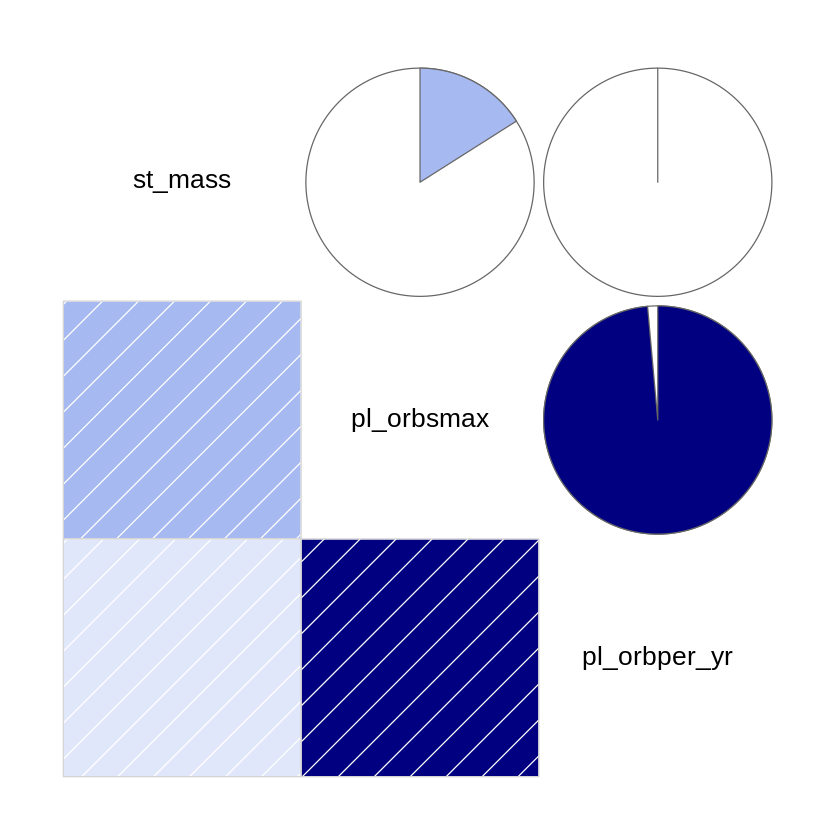

In [9]:
corrgram(df,order=TRUE, lower.panel=panel.shade, upper.panel=panel.pie, text.panel=panel.txt)

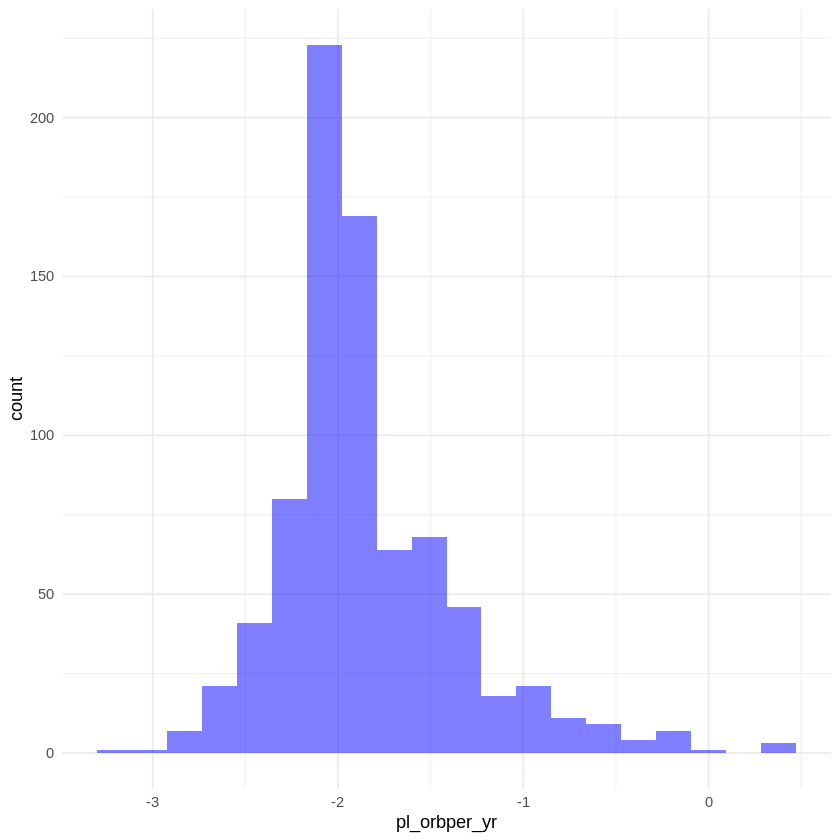

In [10]:
ggplot(df,aes(x=pl_orbper_yr)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

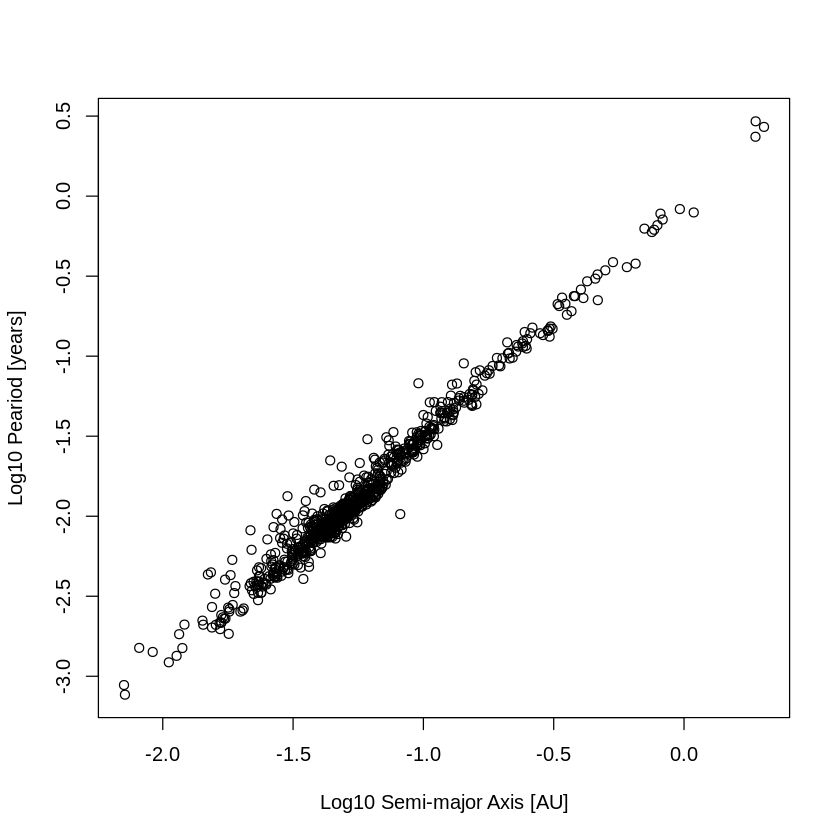

In [11]:
plot(df$pl_orbsmax,df$pl_orbper_yr, xlab="Log10 Semi-major Axis [AU]", ylab="Log10 Peariod [years]")
#plot(df$pl_orbsmax,df$pl_orbper_yr, xlab=TeX(r'$log_{10} a$ [AU]'), ylab="Log10 Peariod [years]")

## Building a linear model:

From *Data Science and Machine Learning Bootcamp with R* by Jose Portilla:

"The general model of building a linear regression model in R looks like this:

```
model <- lm(y ~ x1 + x2,data)

or to use all the features in your data

model <- lm(y ~. , data) # Uses all features

```
"




### Train / Test Split

In [12]:
# Set a random seed
#set.seed(101)

# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(df, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

In [13]:
# Training Data
train = subset(df, sample == TRUE)

# Testing Data
test = subset(df, sample == FALSE)

Trainging Model

In [14]:
model <- lm(pl_orbper_yr ~ .,train) #lm for Linear Model

In [15]:
summary(model)


Call:
lm(formula = pl_orbper_yr ~ ., data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.279328 -0.009216 -0.001686  0.008800  0.172460 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.021868   0.005838  -3.746    2e-04 ***
pl_orbsmax   1.480724   0.004596 322.197   <2e-16 ***
st_mass     -0.438410   0.008733 -50.204   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03366 on 527 degrees of freedom
Multiple R-squared:  0.995,	Adjusted R-squared:  0.9949 
F-statistic: 5.196e+04 on 2 and 527 DF,  p-value: < 2.2e-16


Looks like what we'd expect:

pl_orbsmax should have a coefficinet of ~3/2

st_mass should have a coefficinet of ~-1/2



# Extract Coefficents

In [16]:
#a_coeff <- model$coefficients[2]
a_coeff <- 1.483459
#M_coeff <- model$coefficients[1]
M_coeff <- -0.448316

In [17]:
print('Percent error in "a" coefficient')
( ((3/2) - a_coeff) / (3/2) ) * 100

[1] "Percent error in \"a\" coefficient"


[1] 1.102733

In [18]:
print('Percent error in "M_star" coefficient')
( ((-1/2) - M_coeff) / (-1/2) ) * 100

[1] "Percent error in \"M_star\" coefficient"


[1] 10.3368

# 1.1% in $a$'s coefficient and 10% in $M_{\rm star}$'s coefficient - let's discuss...

The relationship between $P$ and $a$ date back to Kepler's original version of the equation (year 1619 AD) predates Newton's Laws of gravity. Kepler discovered this entirely empirically for our solar system alone (we knew no others at that time), and thus the star's mass did not show up in the equation.

Newton (circa 1687) likely used this relationship to stem his own theories, and a revised version of this equation (the one presented above) includes mass... however we are currently using an approximation. For cases where the planet's mass is comparable in size to the star's,

$P^2 = \frac{4 \pi^2}{G (M_{\rm star}+M_{\rm planet})} a^3$.

Due to selection effects to the observations, we tend to find significantly more larger mass/size planets than there *'should'* be given our theories of formation - thus this table is skewed to heavier massed objects, and thus more likely the add noise to the approximation used. Our parent data set is selected for planet's that have mass estimates, and this can be used in a follow up analysis to see if this may bring down the 10% in the coefficient.



## This all said, not all data have theoritical models or loads of empirical estimates done to inform the interpretation of our results. Let's investigate the quality of our results with respect to our train/test split as if we did not know Kepler's 3rd Law...

# Visualizations

A residual for the $i$th data point, $y_{\rm measured,i} - y_{\rm model,i}$, can be an indicator of the quality of your model.

In [19]:
# Calculate residuals
res <- residuals(model)

# Convert to DataFrame for gglpot
res <- as.data.frame(res)

head(res)

,res
,<dbl>
1,-0.009363762
2,0.017541671
4,0.091966720
5,-0.061361003
7,-0.004368097
8,-0.007186030


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


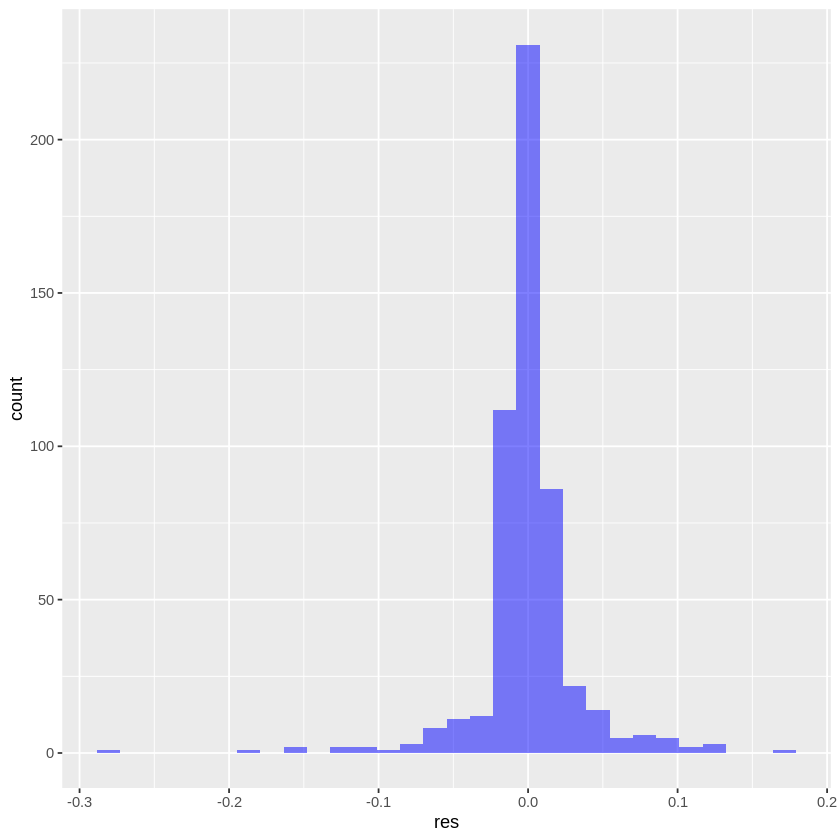

In [20]:
# Histogram of residuals
ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.5)

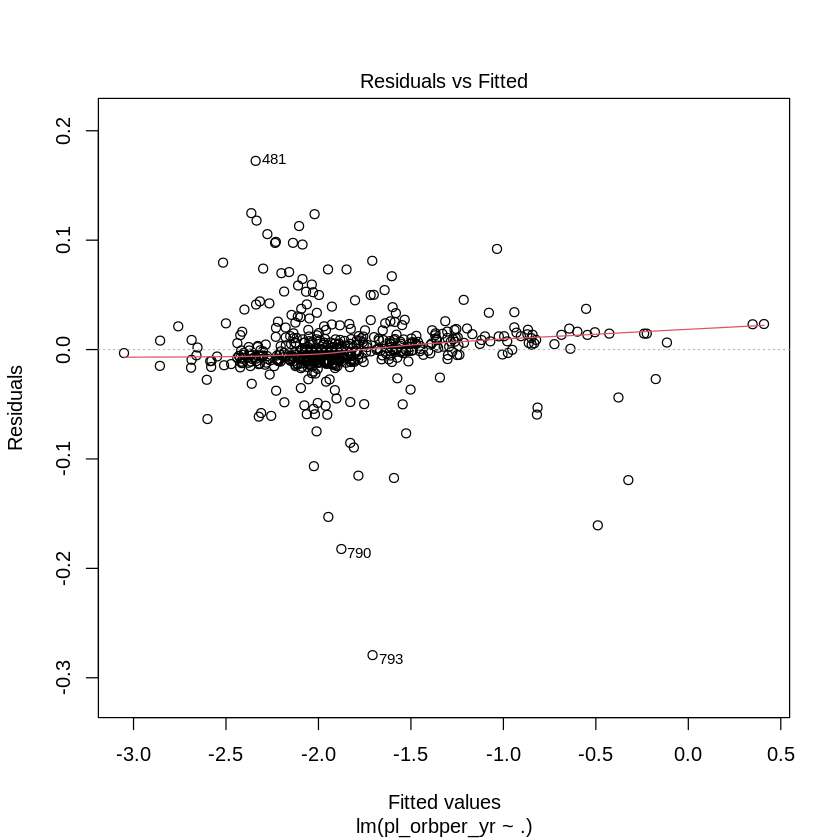

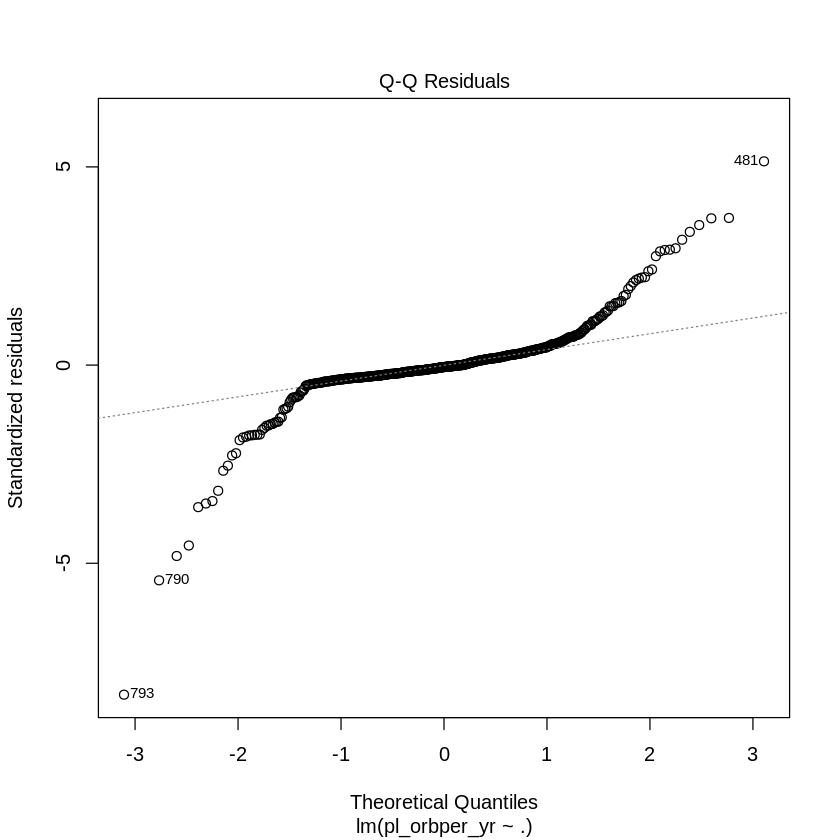

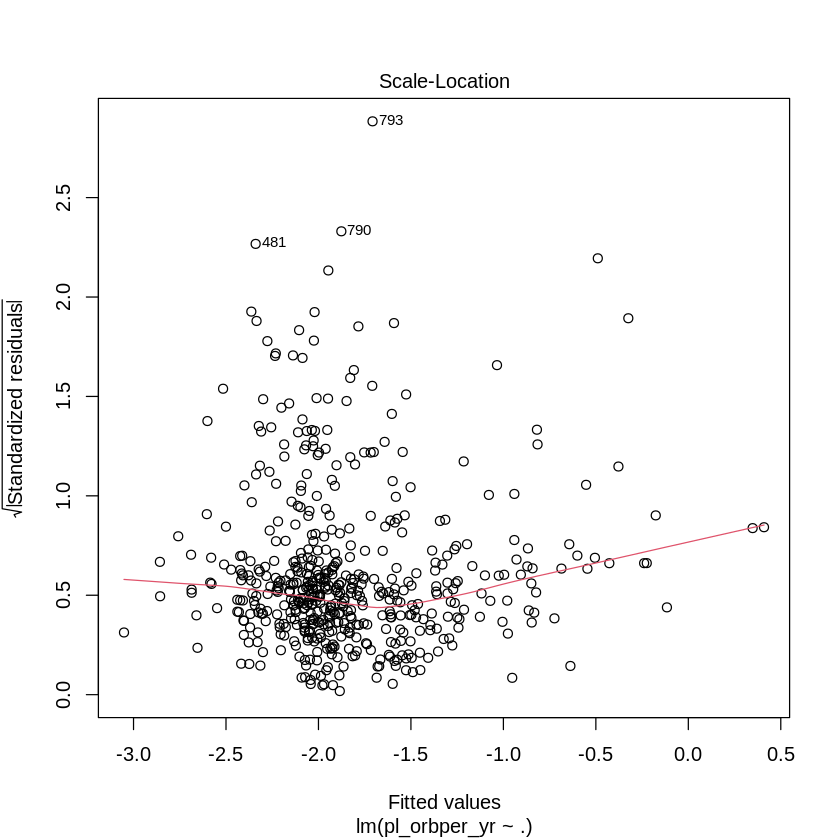

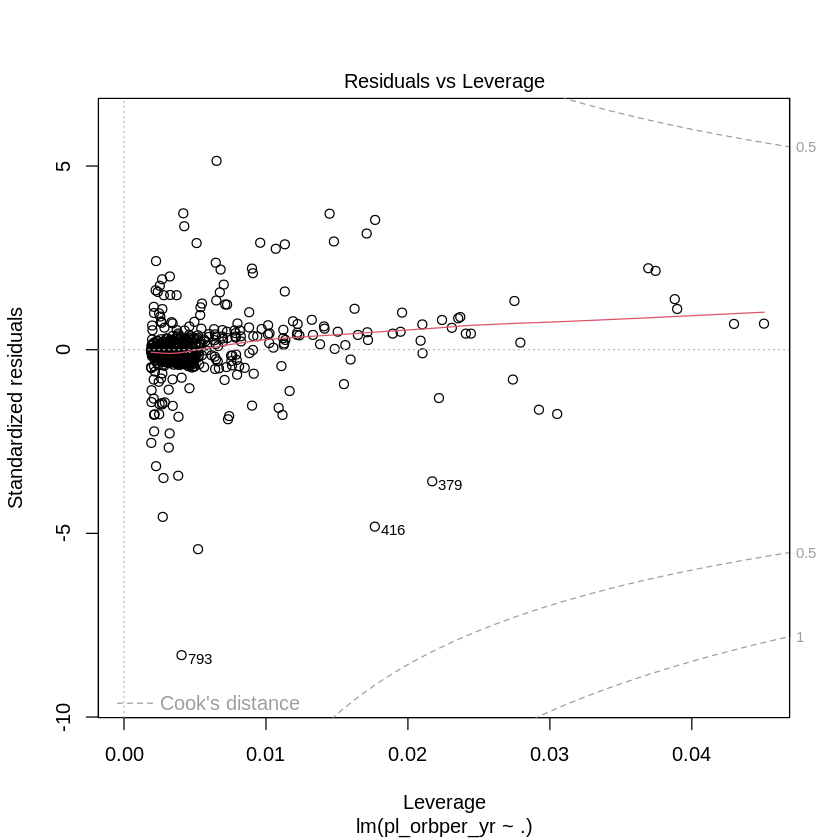

In [21]:
plot(model)

## Let's see what our model looks like overlaid on our raw data

In [22]:
pl_orbper_yr.predictions <- predict(model,test)

In [23]:
results <- cbind(pl_orbper_yr.predictions,test$pl_orbper_yr)
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

In [24]:
head(results)

,pred,real
,<dbl>,<dbl>
3,-1.308743,-1.287072
6,-1.445974,-1.440683
9,-1.952009,-1.956726
12,-2.008027,-1.986468
15,-2.313886,-2.321294
18,-1.999534,-2.002528


Machine Learning models depend on the minimization of quantities like the mean squared error,

Mean( $\Sigma_i (y_{\rm measured,i} - y_{\rm model,i})^2$ )

In [25]:
#mean squared error
mse <- mean((results$real-results$pred)^2)
print(mse)

[1] 0.001215742


In [26]:
#root mean squared error
mse^0.5

[1] 0.0348675

The Root Mean Squared Error is sometimes tough to interpret. As this quantity should represent a deviation from the $y$ values (in our data the period $P$), it's sometimes customary to divide this value be a typical or average value of $y$.

And since we were using $\log_{10}$ values, I will scale these values accordingly.

In [27]:
(10^(mse^0.5)) / (10^mean(df$pl_orbper_yr))
print("days")

[1] 76.77428

[1] "days"


In [28]:
(10^(mse^0.5)) / (10^mean(df$pl_orbper_yr)) / 365.
print("years")

[1] 0.2103405

[1] "years"


So the error in the period is apprixmately 77 days (0.2 years) - which is pretty substantial. This in principle can give a lot of uncertainty for those who want to do follow up measurements. Luckily, we usually measure $P$ directly and $a$ is derived from it in practice.

*Note, the variable is named 'yr' by mistake, and this is mentioned above. The period in this analysis is in years (and converted to $\log_{10}$ years).*

### $R^2$ is a standard gauge of the quality of a model's fitting. An $R^2$ value close to 1 indicates a high quallity fit.

In [29]:
#R^2
SSE = sum((results$pred - results$real)^2)
SST = sum( (mean(df$pl_orbper_yr) - results$real)^2)
R2 = 1 - SSE/SST
R2

[1] 0.9951236